In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-risk-prediction-eu-business/submission_template.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/data_description.txt
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/train.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/test.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/submission_template.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/data_description.txt
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/train.csv
/kaggle/input/alzheimers-disease-risk-prediction-eu-business/test.csv


In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset

In [4]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-risk-prediction-eu-business/train.csv")
df.head(5)
print(f"The number of columns/features: {df.shape[1]}")
print(f"The number of null:\n{df.isnull().sum()}")

The number of columns/features: 35
The number of null:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChan

In [5]:
data = df.iloc[:, 1:35]
data.head(5)
print(data["DoctorInCharge"].unique())

['XXXConfid']


In [27]:
# Omit "DoctorInCharge" from list of features for data analysis
data = df.iloc[:, 1:34]
data.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,7.836104,...,3.085543,0,0,6.643693,0,0,0,0,0,0
1,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,5.218052,...,5.616830,0,1,3.884562,0,0,0,0,1,1
2,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,6.146166,...,3.662461,0,0,4.013722,0,0,1,1,0,1
3,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,6.825155,...,4.648135,0,0,9.355700,1,0,1,0,1,0
4,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,4.715534,...,9.601238,1,0,8.818932,0,1,0,0,0,1


## Look into Data
### Define type of columns(data)

1. Nominal Categorical - Matthews Correlation Coefficient
    1) Gender
    2) EducationLevel
    3) Ethnicity
    4) Smoking
    5) FamilyHistoryAlzheimers,
    6) CardiovascularDisease,
    7) Diabetes,
    8) Depression,
    9) HeadInjury,
    10) Hypertension,
    11) MemoryComplaints
    12) BehavioralProblems
    13) Confusion
    14) Disorientation
    15) PersonalityChanges
    16) DifficultyCompletingTasks
    17) Forgetfulness
    <br>
    <br>
2. Ordinal Categorical - Cramér's V
    1) Age
    <br>
    <br>
3. Continuous Numerical - Point-biseral Correlation
    1) AlcoholConsumption,
    2) PhysicalActivity,
    3) DietQuality,
    4) SleepQuality,
    5) MMSE: Mini-Mental State Exam score (0–30).
    6) FunctionalAssessment: Functional score (0–10).
    7) ADL: Activities of Daily Living score (0–10).
    8) BMI
    9) SystolicBP
    10) DiastolicBP
    11) CholesterolTotal
    12) CholesterolLDL
    13) CholesterolHDL
    14) CholesterolTriglycerides
    <br>
    <br>
4. Diagnosis - Nominal Categorical

#### 1) Matthews Correlations(MCC) for the whole columns/features

##### Features highly related to Diagnosis
1. FunctionalAssessment(-0.38)
2. ADL(-0.34)
3. MemoryComplaints(0.3)
4. MMSE(-0.22)
5. BehavioralProblems(0.21)

Unexpectedly, "Age" is not related to Alzheimer Diagonis. So we have to check distribution of values in Age

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


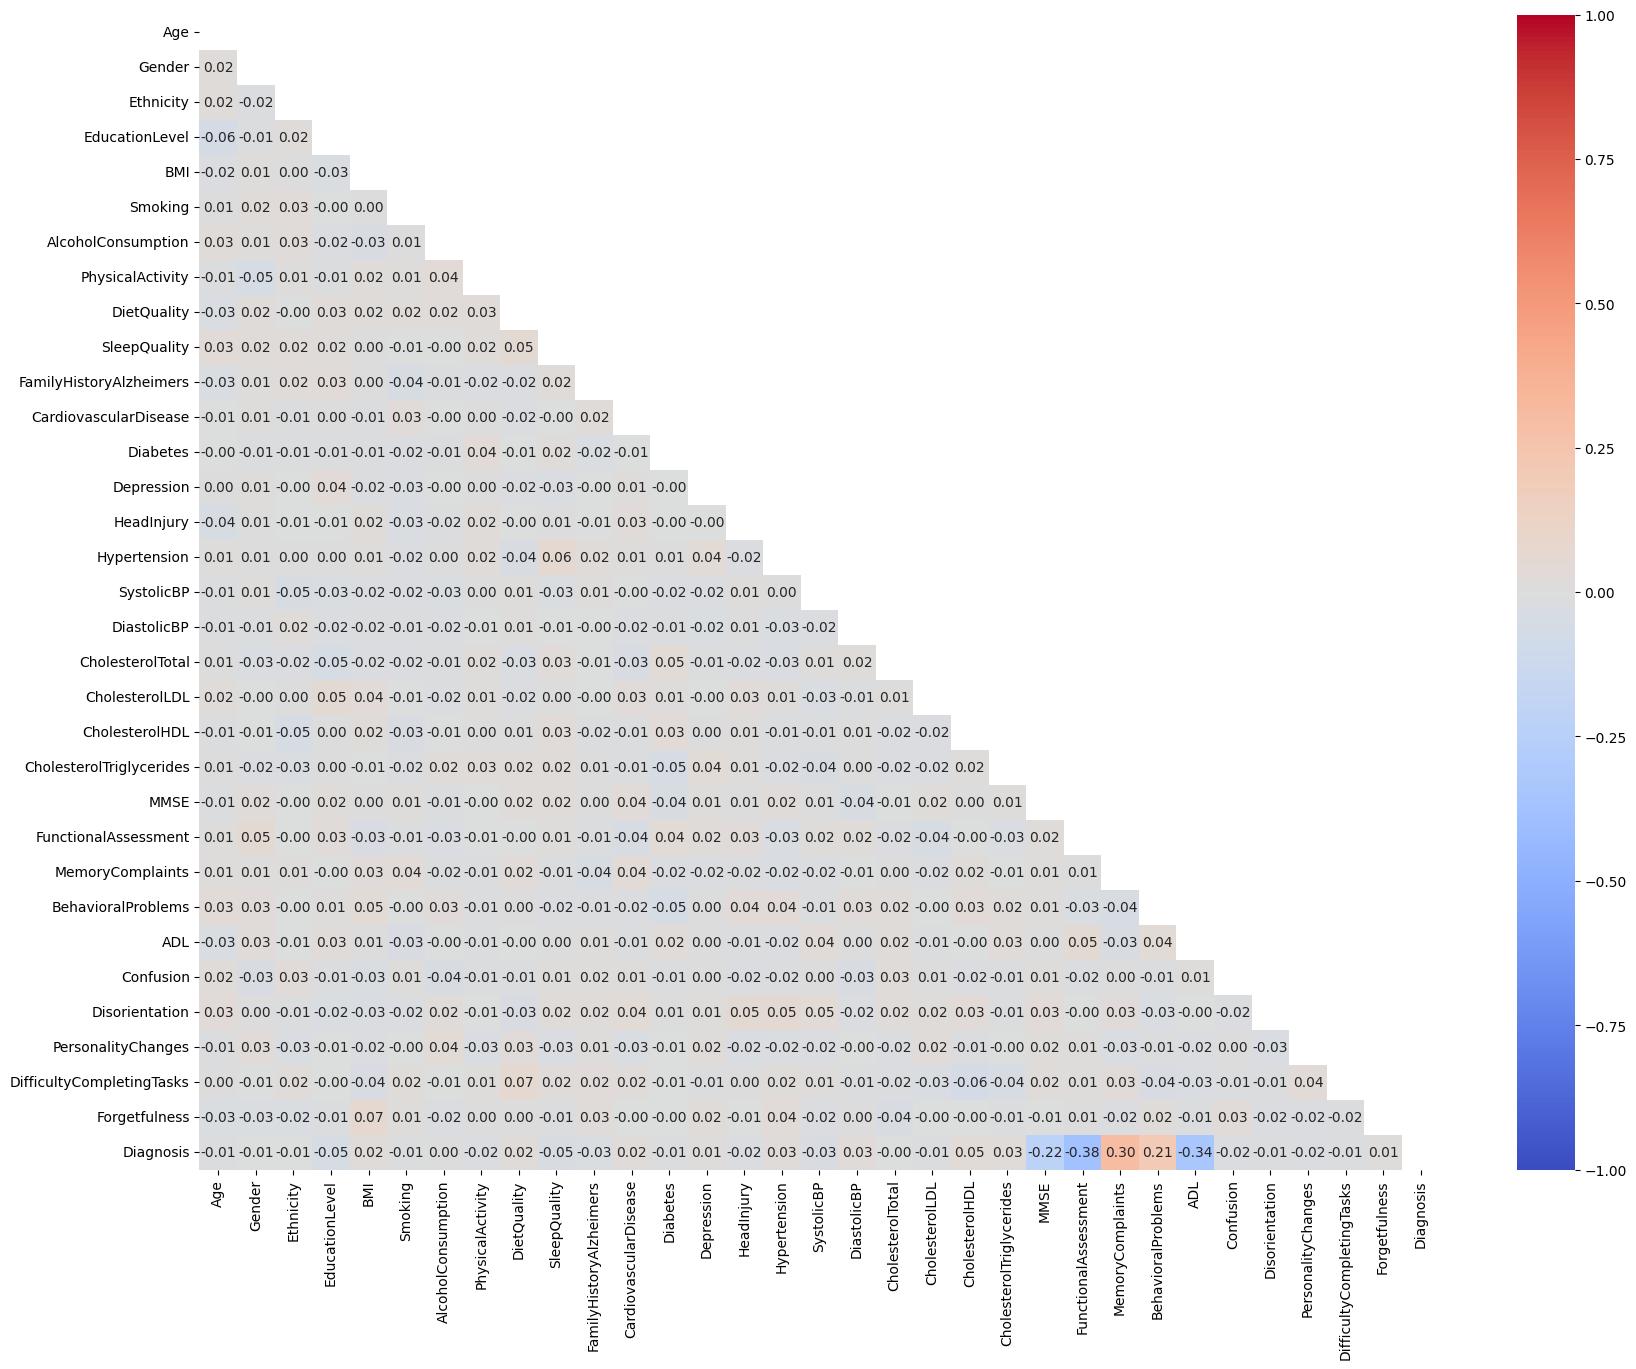

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = data.corr()

plt.rcParams["figure.figsize"] = (20, 15)

mask = np.triu(np.ones_like(data_corr))
ax = sns.heatmap(data_corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask, fmt=".2f")

#### 2) Matthews Correlations(MCC) for Nominal data

##### Features highly related to Diagnosis
1. MemoryComplaints(0.30)
2. BehavioralProblems(-0.21)

In [20]:
drop_Ord_Con = ["Age", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "MMSE", "FunctionalAssessment", "ADL", "BMI", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]
data_Nom =  data.drop(drop_Ord_Con, axis=1)
data_Nom
data_Nom_corr = data_Nom.corr(method="pearson")

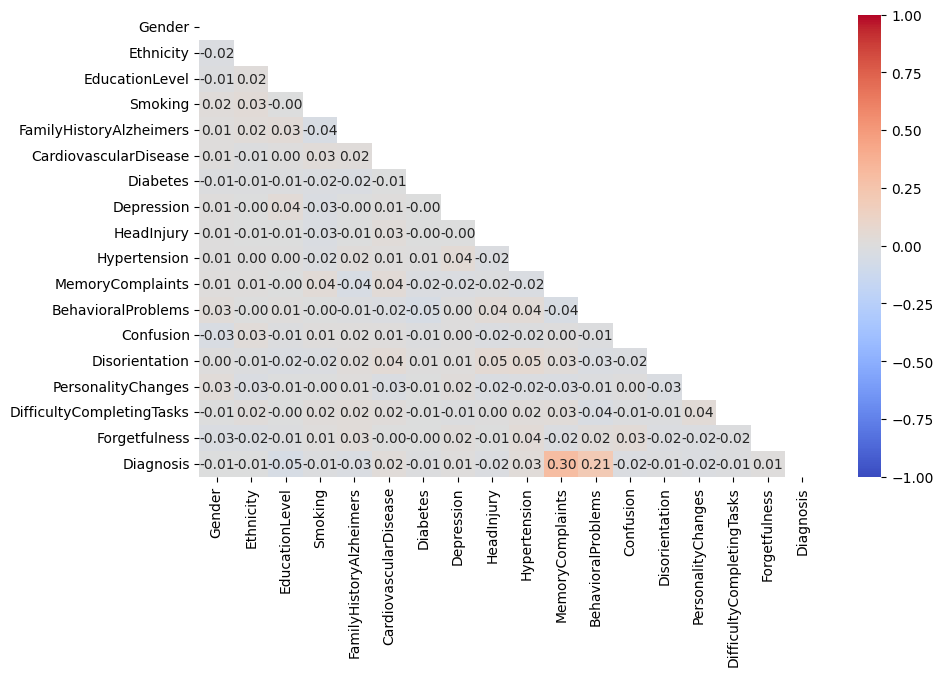

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

mask = np.triu(np.ones_like(data_Nom_corr))
ax = sns.heatmap(data_Nom_corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask, fmt=".2f")

#### 3) Cramer's V for Ordinal data

Age is not related to Diagnosis at all

In [44]:
data_Ord = data.iloc[:, [0,-1]]
data_Ord.head(5)

,Age,Diagnosis
0,87,0
1,70,1
2,82,1
3,76,0
4,61,1


In [36]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs - 1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

for var1 in data_Ord:
  col = []
  for var2 in data_Ord :
    cramers = cramers_V(data_Ord[var1], data_Ord[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
data_Ord_Cramer = pd.DataFrame(cramers_results, columns = data_Ord.columns, index=data_Ord.columns)

# [출처] [Python]명목변수간 상관관계를 분석해주는 Cramer V(크래머 V)|작성자 코코 (https://blog.naver.com/kthchunjae/222290570091)

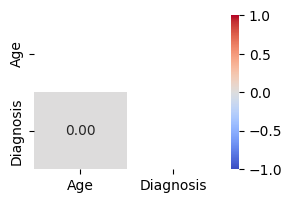

In [41]:
plt.rcParams["figure.figsize"] = (3, 2)

mask = np.triu(np.ones_like(data_Ord_Cramer))
ax = sns.heatmap(data_Ord_Cramer, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask, fmt=".2f")

In [ ]:
df["Age"].unique()

#### 4) Matthews Correlations(MCC) for Nominal data

##### Features highly related to Diagnosis
1. MemoryComplaints(0.30)
2. BehavioralProblems(-0.21)

In [45]:
drop_Nom_Ord = ["Gender", "EducationLevel", "Ethnicity", "Smoking", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury", "Hypertension", "MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness", "Age"]
data_Con =  data.drop(drop_Nom_Ord, axis=1)
data_Con

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis
0,27.764232,16.543170,0.281379,5.923418,7.836104,165,104,152.867282,81.773928,36.315501,156.315737,25.399206,3.085543,6.643693,0
1,37.098744,1.360202,9.242990,1.819284,5.218052,144,93,172.951803,181.531732,59.846219,284.212782,8.292136,5.616830,3.884562,1
2,15.908275,16.329031,1.915913,6.607292,6.146166,90,112,234.274917,76.270979,96.793492,174.718861,21.042238,3.662461,4.013722,1
3,30.302432,11.814030,6.281170,6.204349,6.825155,95,119,233.623114,101.048013,23.251477,230.796600,28.609438,4.648135,9.355700,0
4,24.565357,2.273373,9.976581,2.057188,4.715534,169,69,286.509759,58.658641,78.508468,225.360895,2.629135,9.601238,8.818932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,22.874070,16.006145,7.411056,2.341965,6.688947,160,94,228.586845,140.119152,58.861173,214.975942,7.325867,5.432951,0.214825,0
1715,25.522233,15.432489,4.149322,9.605963,5.235691,128,112,239.084152,137.391883,23.909989,164.038131,11.671289,0.298203,5.590417,1
1716,29.216597,9.424858,8.004951,4.276642,7.641721,124,118,295.214276,175.599879,61.726494,62.163080,28.463207,1.957638,4.030134,0
1717,25.741021,0.036260,6.292084,9.072249,8.497493,161,76,165.713426,143.626546,85.622160,340.890951,6.230189,5.535547,3.464861,0


In [ ]:
def PBCC(X, Y):
    """
    X: continuous variable
    Y: binary variable
    """
    X = np.array(X)
    Y = np.array(Y)
    
    unique = np.sort(np.unique(Y))
    assert len(unique)==2, "Y must be binary variable"
    
    var0 = unique[0]
    var0_idx = np.where(Y==var0)
    M0 = np.mean(X[var0_idx])
    n0 = len(var0_idx)
    
    var1 = unique[1]
    var1_idx = np.where(Y==var1)
    M1 = np.mean(X[var1_idx])
    n1 = len(var1_idx)
    
    sn = np.std(X)
    
    n = n0 + n1
    
    rpb = (M1-M0)/sn * np.sqrt(n1*n0 / (n)**2)
    return rpb

pbr = PBCC(X, Y)

# 또는 scipy를 이용하여
from scipy import stats
pbr = stats.mstats.pointbiserialr(Y,X).correlation

# 출처: https://boksup.tistory.com/59#%EC%A0%90%EC%9D%B4%EC%97%B0_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98(Point-biserial)

In [ ]:
##### Set up Diagnosis as "y_train"
y_train = df.iloc[:, 33]
y_train.head(5)